IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOADING THE DATASET


In [ ]:
df = pd.read_csv('Churn_Modelling.csv', encoding='latin-1')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


VISUALIZATIONS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

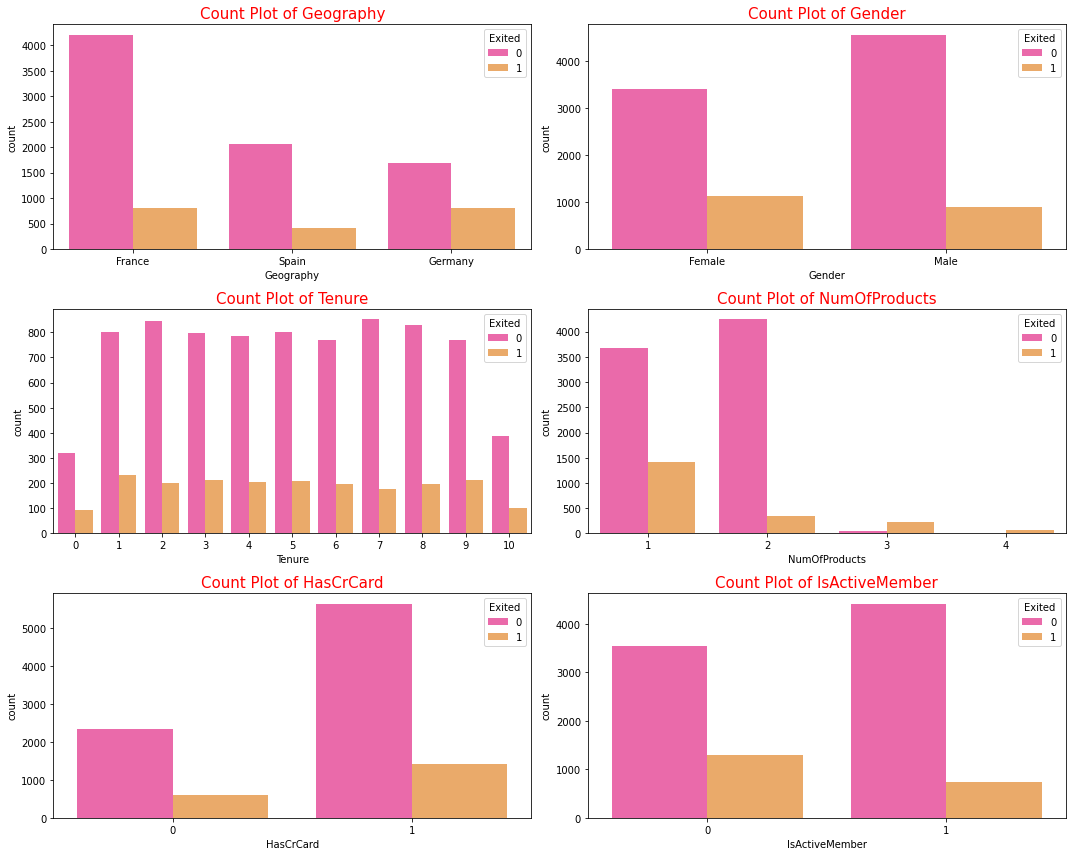

In [ ]:
#visualization of categorical features
fig, ax = plt.subplots(3, 2, figsize = (15, 12))
plt.title("Visualization")
sns.countplot('Geography', hue = 'Exited', data = df, ax = ax[0][0],palette='spring')
sns.countplot('Gender', hue = 'Exited', data = df, ax = ax[0][1],palette='spring')
sns.countplot('Tenure', hue = 'Exited', data = df, ax = ax[1][0],palette='spring')
sns.countplot('NumOfProducts', hue = 'Exited', data = df, ax = ax[1][1],palette='spring')
sns.countplot('HasCrCard', hue = 'Exited', data = df, ax = ax[2][0],palette='spring')
sns.countplot('IsActiveMember', hue = 'Exited', data = df, ax = ax[2][1],palette='spring')

ax[0][0].set_title('Count Plot of Geography',color='red',fontsize=15)
ax[0][1].set_title('Count Plot of Gender',color='red',fontsize=15)
ax[1][0].set_title('Count Plot of Tenure',color='red',fontsize=15)
ax[1][1].set_title('Count Plot of NumOfProducts',color='red',fontsize=15)
ax[2][0].set_title('Count Plot of HasCrCard',color='red',fontsize=15)
ax[2][1].set_title('Count Plot of IsActiveMember',color='red',fontsize=15)

plt.tight_layout()
plt.show()

DESCRIPTIVE STATISTICS

In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df_num = df[['RowNumber','Tenure','CustomerId','CreditScore','Age','NumOfProducts','HasCrCard','IsActiveMember','Exited']]
df_cat = df[['Surname','Geography','Gender']]
df_num.head()


,RowNumber,Tenure,CustomerId,CreditScore,Age,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,1,2,15634602,619,42,1,1,1,1
1,2,1,15647311,608,41,1,0,1,0
2,3,8,15619304,502,42,3,1,0,1
3,4,1,15701354,699,39,2,0,0,0
4,5,2,15737888,850,43,1,1,1,0


In [ ]:
df_cat.head()


,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [ ]:
df_num.describe()

,RowNumber,Tenure,CustomerId,CreditScore,Age,NumOfProducts,HasCrCard,IsActiveMember,Exited
count,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5000.50000,5.012800,1.569094e+07,650.528800,38.921800,1.530200,0.70550,0.515100,0.203700
std,2886.89568,2.892174,7.193619e+04,96.653299,10.487806,0.581654,0.45584,0.499797,0.402769
min,1.00000,0.000000,1.556570e+07,350.000000,18.000000,1.000000,0.00000,0.000000,0.000000
25%,2500.75000,3.000000,1.562853e+07,584.000000,32.000000,1.000000,0.00000,0.000000,0.000000
50%,5000.50000,5.000000,1.569074e+07,652.000000,37.000000,1.000000,1.00000,1.000000,0.000000
75%,7500.25000,7.000000,1.575323e+07,718.000000,44.000000,2.000000,1.00000,1.000000,0.000000
max,10000.00000,10.000000,1.581569e+07,850.000000,92.000000,4.000000,1.00000,1.000000,1.000000


In [ ]:
df_cat.describe(exclude = ['int64','float64'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


HANDLE THE MISSING VALUES

In [ ]:
print("Column          Missing values")
print("------------------------------")
df.isnull().sum()

Column          Missing values
------------------------------


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
print(f"Our target variable is Exited. We can observe that it has only two possible variables: {df['Exited'].unique().tolist()}")

Our target variable is Exited. We can observe that it has only two possible variables: [1, 0]


In [35]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

KeyError: ignored

In [36]:
new_names = {
    'CreditScore': 'credit_score',
    'Geography': 'country',
    'Gender': 'gender',
    'Age': 'age',
    'Tenure': 'tenure',
    'Balance': 'balance',
    'NumOfProducts': 'number_products',
    'HasCrCard': 'owns_credit_card',
    'IsActiveMember': 'is_active_member',
    'EstimatedSalary': 'estimated_salary',
    'Exited': 'exited'
}

In [ ]:
df.rename(columns=new_names, inplace=True)
df.head()

,credit_score,country,gender,age,tenure,balance,number_products,owns_credit_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


REPLACE OUTLIERS

In [ ]:
def detect_outlier(df):
 outlier = []
 threshold = 3
 mean = np.mean(df)
 std = np.std(df)
 for i in df:
     z_score = (i - mean)/std
 if np.abs(z_score)>threshold:
    outlier.append(i)
 return outlier
 CreditScore_list = df['CreditScore'].tolist()
 Balance_list = df['Balance'].tolist()
 EstimatedSalary_list = df_cat['EstimatedSalary'].tolist()
 CreditScore_outlier = detect_outlier(CreditScore_list)
 CreditScore_outlier
 Output-[359, 350, 350, 358, 351, 350, 350, 350]
 Balance_outlier = detect_outlier(Balance_list)
 Balance_outlier
 EstimatedSalary_outlier = detect_outlier(EstimatedSalary_list)
 EstimatedSalary_outlier

In [ ]:
print("Shape of Data before removing outliers: {}".format(df.shape))

Shape of Data before removing outliers: (10000, 11)


ENCODING

In [37]:
# Encoding Categorical variables into numerical variables
# One Hot Encoding

x = pd.get_dummies(x)

x.head()
x.shape

(10000, 13)

SPLIT THE DATA INTO DEPENDENT AND INDEPENDENT VARIALBLES

In [ ]:
# splitting the dataset into x(independent variables) and y(dependent variables)

x = df.iloc[:,0:10]
y = df.iloc[:,10]

print(x.shape)
print(y.shape)

print(x.columns)
#print(y)

(10000, 10)
(10000,)
Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'number_products', 'owns_credit_card', 'is_active_member',
       'estimated_salary'],
      dtype='object')


SCALE THE INDEPENDENT VARIABLES

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = pd.DataFrame(x_train)
x_train.head()

,credit_score,country,gender,age,tenure,balance,number_products,owns_credit_card,is_active_member,estimated_salary
2967,579,Germany,Female,39,5,117833.30,3,0,0,5831.00
700,750,France,Female,32,5,0.00,2,1,0,95611.47
3481,729,Spain,Female,34,9,53299.96,2,1,1,42855.97
1621,689,Spain,Male,38,5,75075.14,1,1,1,8651.92
800,605,France,Male,52,7,0.00,2,1,1,173952.50


SPLIT THE DATA INTO TRAINING AND TESTING

In [ ]:
# splitting the data into training and testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(7500, 10)
(7500,)
(2500, 10)
(2500,)
